# Content and Objectives

+ Show misc empirical parameters based on an iid realizations
+ Several distribution can be chosen which are then average to show the effect of the CLT

# Import

In [1]:
# importing
import numpy as np

from scipy import stats, special

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [3]:
# vector of realizations 
# NOTE: you may adapt this to play with the parameters

N_realizations = int( 50 )

rng = np.random.default_rng()


In [4]:
# some distributions to sample from
# NOTE: You may add some more here
distributions = [
    stats.norm(loc=0, scale=1),
    stats.uniform(loc=-1, scale=2),
    stats.expon(scale=1),
    stats.gamma( a=3, loc=0, scale=1),
    stats.beta( a=1, b=.5, loc=0, scale=1),
]


In [5]:
# select distribution randomly and get their theoretical parameters 
dist = np.random.choice(distributions)

mean, var = dist.stats(moments="mv")

# quantile levels
quantiles = [0.05, 0.5, 0.95]

# theoretical quantiles
Q_theory = dist.ppf( quantiles )

# Simulation

+ first samples are generated 
+ then, paramters are being extracted and printed or plotted

In [6]:
# sample population for CLT
# using dictionaries here; you may check this out in "basic_concepts" simulation
X = dist.rvs( size = N_realizations )

emp_mean = np.average( X )
emp_var = np.var( X )
emp_Q = np.quantile( X, quantiles )

### give some parameters

In [7]:
print('-----')
print('Distribution: ', dist.dist.name )
print('-----\n')

print('Empirical expectation: \t', emp_mean )
print('Theoretical expectation:', mean )
print()
print('Empirical variance: \t', emp_var )
print('Theoretical variance: \t', var )
print()
print('Empirical quantiles for ', quantiles, ': \t', emp_Q )
print('Theoretical quantiles for ', quantiles, ': \t', Q_theory )


-----
Distribution:  expon
-----

Empirical expectation: 	 1.0685243896481667
Theoretical expectation: 1.0

Empirical variance: 	 1.022276135479342
Theoretical variance: 	 1.0

Empirical quantiles for  [0.05, 0.5, 0.95] : 	 [0.05945396 0.76080469 2.92929577]
Theoretical quantiles for  [0.05, 0.5, 0.95] : 	 [0.05129329 0.69314718 2.99573227]


### get and plot empirical cdf and true cdf

+ and, yes: the calculation of the empirical cdf is pretty cumbersome, but
+ this may show the different application of the empirical formula

In [8]:
# first get x axis
x_min = np.min( X )
x_max = np.max( X )
delta_x = 0.01
x_values_cdf = np.arange( x_min, x_max + delta_x, delta_x)

# empirical cdf at all points
emp_cdf = np.zeros_like( x_values_cdf )
for ind_x, val_x in enumerate( x_values_cdf ):
    emp_cdf[ ind_x ] = np.sum( X <= val_x )
emp_cdf /= N_realizations

# get theoretical cdf
theo_cdf = dist.cdf( x_values_cdf )

# empirical cdf only at occurring values
# NOTE: by "line-connecting-construction", we will not obtain a staircase here
X_sorted = np.sort( X )
emp_cdf_sorted = np.arange(1, len(X_sorted) + 1) / len(X_sorted)

Text(0.5, 0, '$x$')

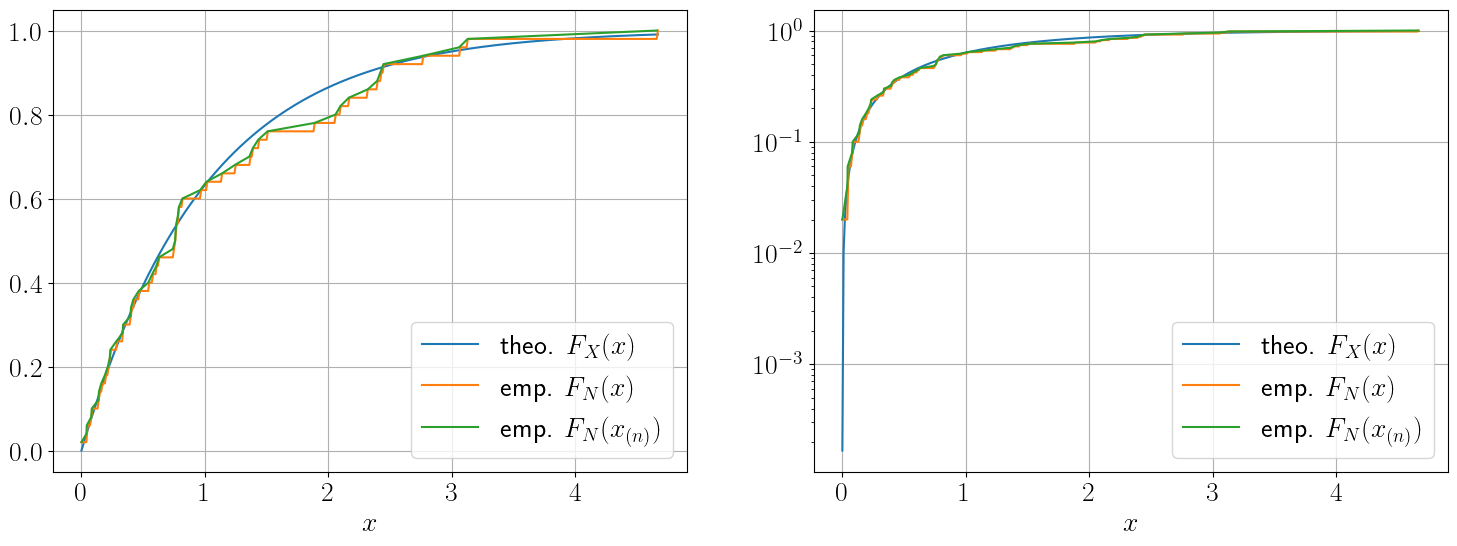

In [9]:
plt.subplot(121)
plt.plot( x_values_cdf, theo_cdf, label='theo. $F_X(x)$')
plt.plot( x_values_cdf, emp_cdf, label='emp. $F_N(x)$')
plt.plot( X_sorted, emp_cdf_sorted, label='emp. $F_N(x_{(n)})$')
plt.grid( True ) 
plt.legend( )
plt.xlabel('$x$')

plt.subplot(122)
plt.semilogy( x_values_cdf, theo_cdf, label='theo. $F_X(x)$')
plt.semilogy( x_values_cdf, emp_cdf, label='emp. $F_N(x)$')
plt.semilogy( X_sorted, emp_cdf_sorted, label='emp. $F_N(x_{(n)})$')
plt.grid( True ) 
plt.legend( )
plt.xlabel('$x$')